In [18]:
using FITSIO, FITSTables, DataFrames, Random, Statistics, PyPlot
include("model.jl")
include("get_apogee_spectra.jl");

In [2]:
apogee = DataFrame()
FITS("../cats/APOGEE-DR16-allStar-r12-l33.fits") do f
    for col in ["APSTAR_ID", "TARGET_ID", "ASPCAP_ID", "FILE", "ND_FE", "TEFF", "LOGG", 
            "TELESCOPE", "FIELD", "LOCATION_ID", "STARFLAG", "APOGEE_ID"
            ]
        apogee[!, Symbol(col)] = read(f[2], col)
    end
end
;

In [19]:
Random.seed!(0)
ntest = 1000
test_indices = rand(1:size(apogee, 1), ntest)

present = download_apogee_spectra(apogee[test_indices, :]);
test_spectra = []
test_ivar = []
for row in eachrow(apogee[test_indices[present], :])
    flux, err = load_apogee_spectrum(row)
    push!(test_spectra, flux)
    push!(test_ivar, err.^-2)
end

of 1000 spectra, 231 need to be downloaded


https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/apo25m/BAADEWIN_001-04/aspcapStar-r12-2M18012424-2930092.fits:
2020-06-18 20:42:46 ERROR 404: Not Found.
2020-06-18 20:42:47 URL:https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/apo25m/116+00/aspcapStar-r12-2M23595606+6251121.fits [135360/135360] -> "APOGEE_spectra/aspcapStar-r12-2M23595606+6251121.fits" [1]
FINISHED --2020-06-18 20:42:47--
Total wall clock time: 0.5s
Downloaded: 1 files, 132K in 0.1s (1.03 MB/s)
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/apo25m/040+45/aspcapStar-r12-2M16111711+2438288.fits:
2020-06-18 20:42:47 ERROR 404: Not Found.
2020-06-18 20:42:48 URL:https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/apo25m/045+06/aspcapStar-r12-2M18483900+1229317.fits [135360/135360] -> "APOGEE_spectra/aspcapStar-r12-2M18483900+1229317.fits" [1]
FINISHED --2020-06-18 20:42:48--
Total wall clock time: 0.5s
Downloaded: 1 files, 132K in 0.2s (817 KB/s)
2020-06-18 20:42:48 URL:https:

In [58]:
Random.seed!(1)
nref = 30000
ref_indices = rand(1:size(apogee, 1), nref)
present = download_apogee_spectra(apogee[ref_indices, :]);
rf_spectra = []
rf_ivar = []
for row in eachrow(apogee[ref_indices[present], :])
    flux, err = load_apogee_spectrum(row)
    push!(rf_spectra, flux)
    push!(rf_ivar, err.^-2)
end

rf_spectra = reduce(hcat, rf_spectra)'
rf_ivar = reduce(hcat, rf_ivar)'

of 30000 spectra, 19557 need to be downloaded


https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/apo25m/K06_078+16/aspcapStar-r12-2M19094171+4645518.fits:
2020-06-19 16:16:11 ERROR 404: Not Found.
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/lco25m/001-01-O/aspcapStar-r12-AP17521958-2847173.fits:
2020-06-19 16:16:11 ERROR 404: Not Found.
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/lco25m/SMC3/aspcapStar-r12-2M00482328-7243490.fits:
2020-06-19 16:16:11 ERROR 404: Not Found.
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/apo25m/GD1-5/aspcapStar-r12-2M14300300+5730184.fits:
2020-06-19 16:16:12 ERROR 404: Not Found.
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/lco25m/N1851/aspcapStar-r12-2M05134458-3958555.fits:
2020-06-19 16:16:12 ERROR 404: Not Found.
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/apo25m/ANDR1/aspcapStar-r12-AP00385694+4110284.fits:
2020-06-19 16:16:12 ERROR 404: Not Found.
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/

29398×8575 Adjoint{Float32,Array{Float32,2}}:
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf  …  Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf  …  Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf  …  Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  Inf  Inf  Inf  Inf  Inf     Inf  Inf  Inf  Inf  Inf  Inf  Inf
 Inf  Inf  Inf  In

In [59]:
wl_grid = 10 .^ range(log10(15100.802); step=6e-6, length=length(rf_spectra[1, :]));

In [60]:
wlmask = 15900 .< wl_grid .< 16400
rf_spectra = rf_spectra[:, wlmask]
rf_ivar = rf_ivar[:, wlmask]
test_spectra = [s[wlmask] for s in test_spectra]
test_ivar = [p[wlmask] for p in test_ivar]
wl_grid = wl_grid[wlmask]
;

  3.990250 seconds (157 allocations: 521.649 MiB)
Float32[1.0547271, 1.1248716, 1.1304504, 1.0959716, 1.0639312, 1.0483947, 1.0288943, 0.975018, 0.88287544, 0.7876877]
1

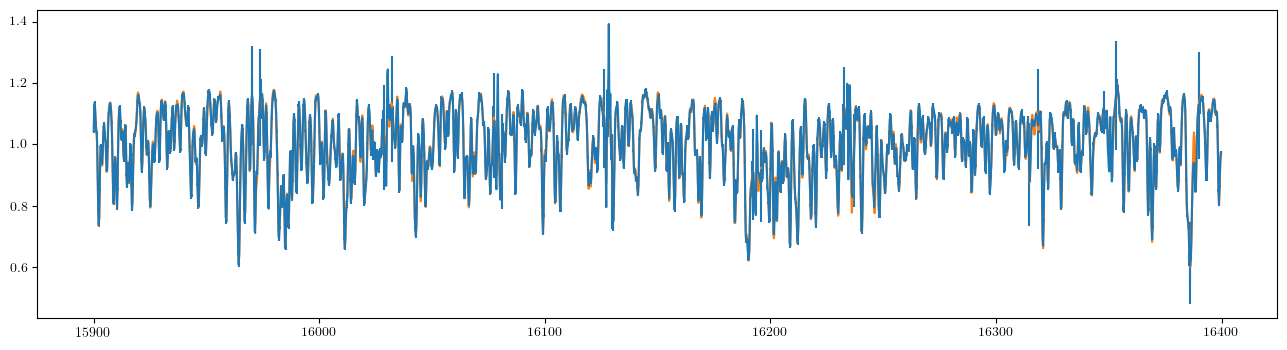

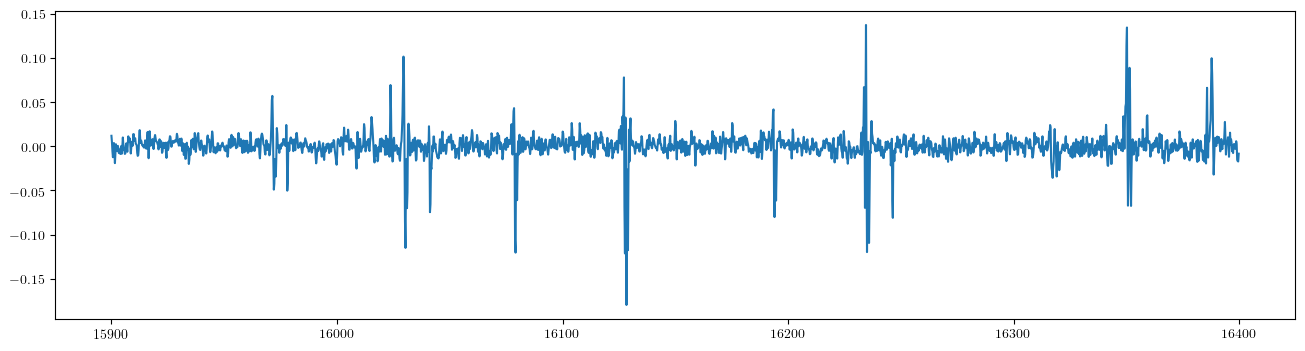

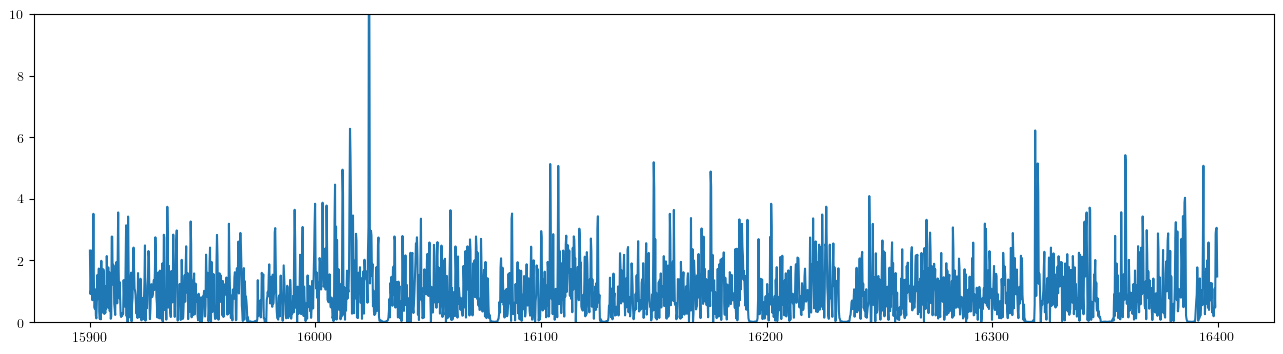

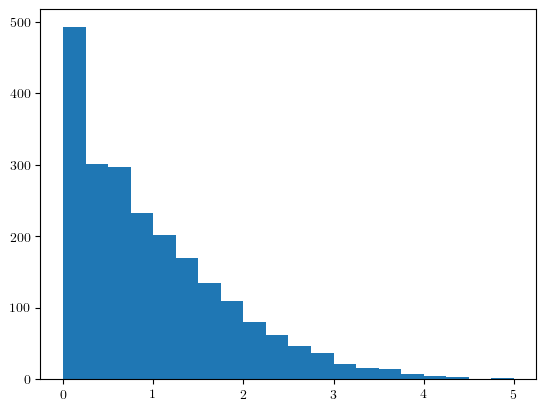

.9554024


In [61]:
maskfrac = 0.1
k = 10
q = 5

rf_set = rf_spectra

f, ivar = rand(collect(zip(test_spectra, test_ivar)))
mask = rand(length(test_spectra[1])) .< maskfrac

figure(figsize=(16, 4))
pltmask = 1000:1200
pltmask = wl_grid .> 0
masklarge(e) = e < 0.3 ? e : NaN
yerr = masklarge.(ivar[pltmask].^(-1/2))
errorbar(wl_grid[pltmask], f[pltmask], yerr=yerr)
@time pf = predict_spectral_range(f, ivar, rf_spectra, nothing, 200, 50, mask)
println(pf[1:10])
plot(wl_grid[pltmask], pf[pltmask], label="k=6, q=5")


figure(figsize=(16, 4))
plot(wl_grid[pltmask], pf[pltmask] - f[pltmask], label="k=6, q=5")

figure(figsize=(16, 4))
plot(wl_grid[pltmask], abs.((pf[pltmask] - f[pltmask]) .* sqrt.(ivar[pltmask])), label="k=6, q=5")
ylim(0, 10)

figure()
plt.hist(abs.((pf[pltmask] - f[pltmask]) .* sqrt.(ivar[pltmask])), range=[0,5], bins=20)
println(mean(((pf[pltmask] - f[pltmask]) .* sqrt.(ivar[pltmask])).^2))

#@time pf = predict_spectral_range(f, ivar, rf_spectra, nothing, 1000, 50, mask)
#plot(wl_grid[pltmask], pf[pltmask], label="k=50, q=5")

#σ = ivar.^(-1/2)
#σ[σ .== Inf] .= 1.
#neighbors = find_neighbors(f[.! mask], rf_spectra[:, .! mask], k)
#plot(wl_grid[pltmask], rf_spectra[neighbors, pltmask]', c="k", alpha=0.2)
#legend()

In [62]:
include("model.jl")
function MSE(rf_spectra, rf_ivar, test_spectra, test_ivar, k, q; maskfrac = 0.1, N=500)
    Random.seed!(2)
    
    MSE = map(collect(zip(test_spectra, test_ivar))[1:N]) do (f, ivar)
        masksize = 100
        npix = size(rf_spectra, 2)
        ind = rand(1 : npix-100)
        mask = ind .<= (1:npix) .<= ind + 100
        
        
        pf = predict_spectral_range(f, ivar, rf_spectra, rf_ivar, k, q, mask)
       
        #figure(figsize=(12, 4))
        #errorbar(wl_grid[mask], f[mask], yerr=ivar[mask].^(-1/2))
        #plot(wl_grid[mask],pf[mask])
        #ylim(0, 1.2)
        
        #figure(figsize=(12, 3))
        #plot((pf[mask] - f[mask]).^2 .* ivar[mask])
        
        mean((pf[mask] - f[mask]).^2 .* ivar[mask])
    end
    mean(MSE)
end
@time MSE(rf_spectra, rf_ivar, test_spectra, test_ivar, 10, 5; N=1)

 46.487603 seconds (2.89 M allocations: 645.933 MiB)


4.7557054f0

In [66]:
MSEss = []
@time for k in 10:10:100
    println(k)
    qs = collect(1:5:min(k-1, 300))
    MSEs = [MSE(rf_spectra, nothing, test_spectra, test_ivar, k, q; N=50) for q in qs]
    push!(MSEss, MSEs)
end

10
20
30
40
50
60
70
80
90
100
5314.126442 seconds (1.06 M allocations: 2.738 TiB, 3.04% gc time)


In [64]:
MSE(rf_spectra, rf_ivar, test_spectra, test_ivar, 10, 5, N=900)

5.744533f0

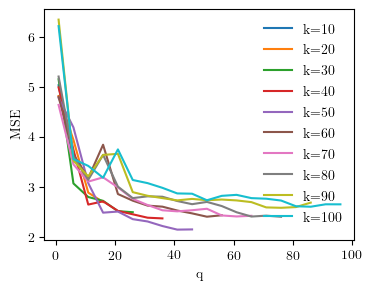

In [67]:
figure(figsize=(4, 3))
for (k, MSEs) in zip(10:10:100, MSEss)
    qs = collect(1:5:min(k-1, 300))
    plot(qs, MSEs, label="k=$k")
end
xlabel("q")
ylabel("MSE")
legend()
savefig("../../Desktop/MSEq2.pdf")

In [68]:
wl_grid

2241-element Array{Float64,1}:
 15900.032542244211
 15900.252210829081
 15900.471882448808
 15900.69155710343 
 15900.91123479299 
 15901.130915517531
 15901.350599277095
 15901.570286071723
 15901.789975901489
 15902.00966876637 
 15902.229364666442
 15902.449063601745
 15902.668765572324
     ⋮             
 16397.28756773085 
 16397.51410619523 
 16397.74064778938 
 16397.967192513366
 16398.193740367176
 16398.42029135088 
 16398.646845464526
 16398.873402708152
 16399.099963081804
 16399.326526585526
 16399.553093219358
 16399.779662983346

# Nd stuff

In [ ]:
ndline = 
nd_line = 16051 .< wl_grid .< 16056

In [87]:
row = apogee[apogee.APOGEE_ID .== "2M16011638-1201525", :]
download_apogee_spectra(rows)
flux, ivar = load_apogee_spectrum(row[1, :]);
flux = flux[wlmask]
err = ivar[wlmask]
;

of 1 spectra, 0 need to be downloaded


In [89]:
err[err .> 1] .= NaN;

125-element view(::Array{Float32,1}, [269, 271, 272, 274, 275, 277, 578, 579, 580, 581  …  2088, 2089, 2133, 2134, 2135, 2136, 2141, 2142, 2224, 2225]) with eltype Float32:
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
   ⋮
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

In [94]:
ndmask = wl_grid .> 0
for line in [16304, 15912, 16635, 15284, 16262, 15368, 16558, 16383, 15978]
    ndmask[line - 5 .< wl_grid .< line + 5] .= false
end

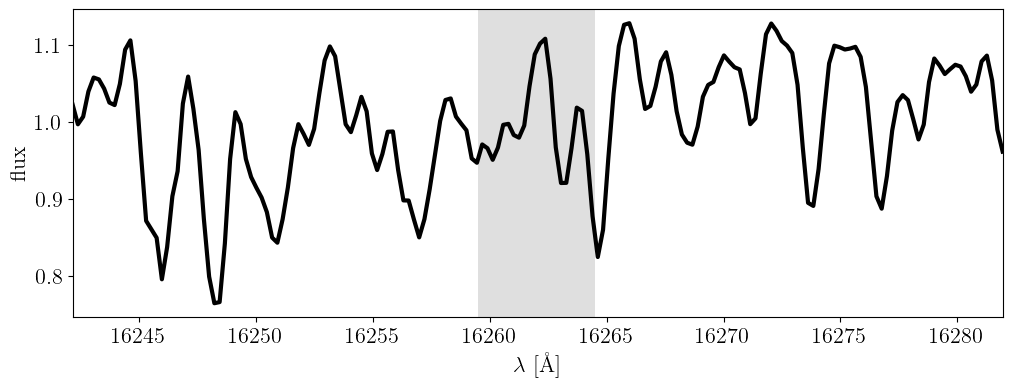

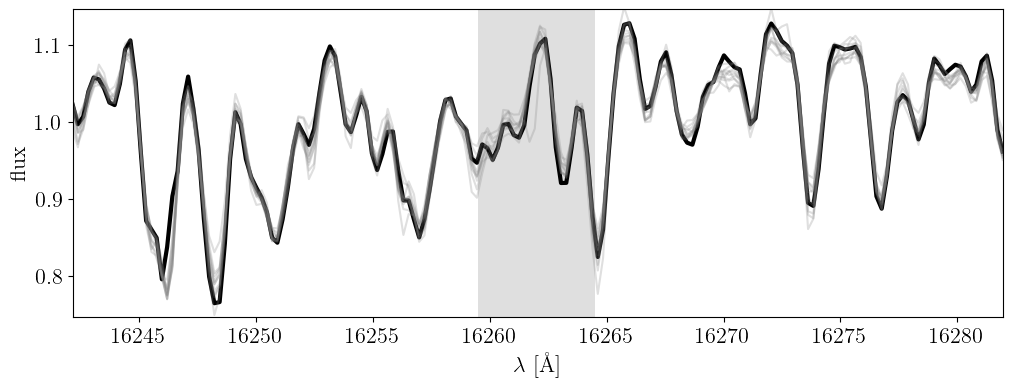

In [97]:
fontsize = 16

Δλ = 2.5
nd_line = 16262#16053.625
line_mask = nd_line - Δλ .< wl_grid .< nd_line + Δλ
plotmask = nd_line - 20 .< wl_grid .< nd_line + 20

figure(figsize=(12, 4))
#errorbar(wl_grid[plotmask], f[plotmask], yerr=err[plotmask], c="k", lw=3)
plot(wl_grid[plotmask], f[plotmask], c="k", lw=3)
axvspan(nd_line-Δλ, nd_line+Δλ, fc="grey", alpha=0.25)
ylims = ylim()
xlabel(L"$\lambda$ [\AA]", fontsize=fontsize); ylabel("flux", fontsize=fontsize); 
gca().tick_params(labelsize=16)
xlim(wl_grid[plotmask][1], wl_grid[plotmask][end])

#-------------------------------------------------------------

F = rf_spectra[find_neighbors(f[ndmask], rf_spectra[:, ndmask], k), :]

figure(figsize=(12, 4))
plot(wl_grid[plotmask], f[plotmask], c="k", lw=3)
plot(wl_grid[plotmask], F[:, plotmask]', alpha=0.25, c="gray");
axvspan(nd_line-Δλ, nd_line+Δλ, fc="grey", alpha=0.25)
ylim(ylims)
xlabel(L"$\lambda$ [\AA]", fontsize=fontsize); ylabel("flux", fontsize=fontsize); 
xlim(wl_grid[plotmask][1], wl_grid[plotmask][end])
gca().tick_params(labelsize=16)

In [96]:
k

10